In [375]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
import math as m
import seaborn as sns

import tensorflow.keras.datasets as tfds


import tensorflow_probability as tfp
tfd = tfp.distributions

import random
import seaborn as sn

In [191]:
(x_train , y_train) , (x_test, y_test) = (tfds.mnist.load_data())

In [192]:
x_train.shape

(60000, 28, 28)

In [193]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [194]:
idx = np.argsort(y_test)
x_train_sorted = x_train[idx]
y_train_sorted = y_train[idx]

In [195]:

num_classes = np.unique(y_train)
mean_digits = []
std_digits = []
epsilon = tf.cast((1e-2), tf.float64)
for label in num_classes:
  x_train_by_label = tf.cast(tf.convert_to_tensor(x_train[y_train == label]), tf.float64)
  mean = tf.cast(tf.math.reduce_mean(x_train_by_label,0), tf.float64)
  std = tf.cast((tf.math.reduce_std(x_train_by_label,0)) , tf.float64) + epsilon
  mean_digits.append(mean)
  std_digits.append(std)


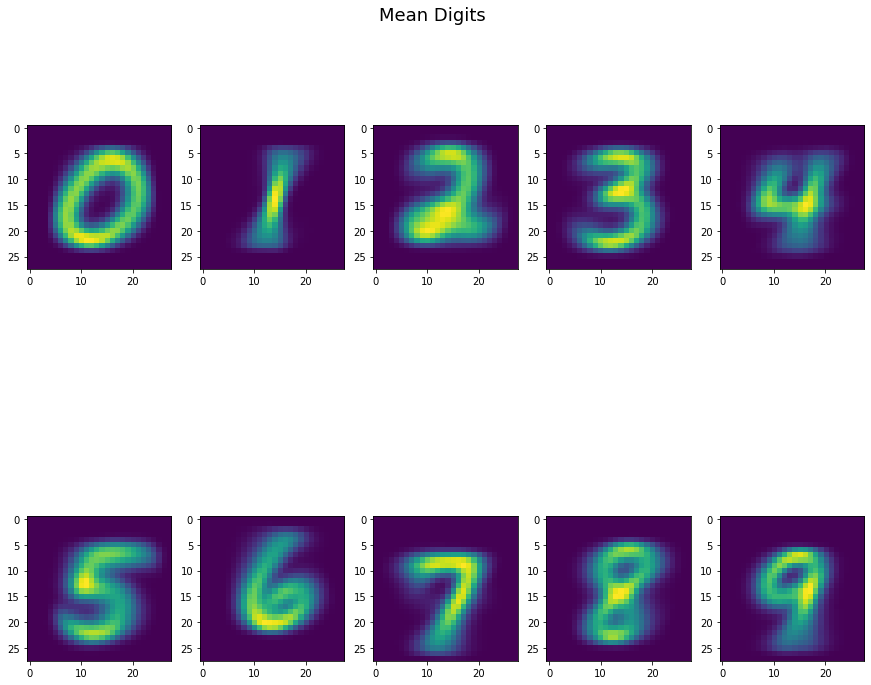

In [197]:
fig, axes = plt.subplots(2, 5, figsize=(15, 12)) 
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Mean Digits", fontsize=18, y=0.95)
for img, ax in zip(mean_digits, axes.flat):
  ax.imshow(img)

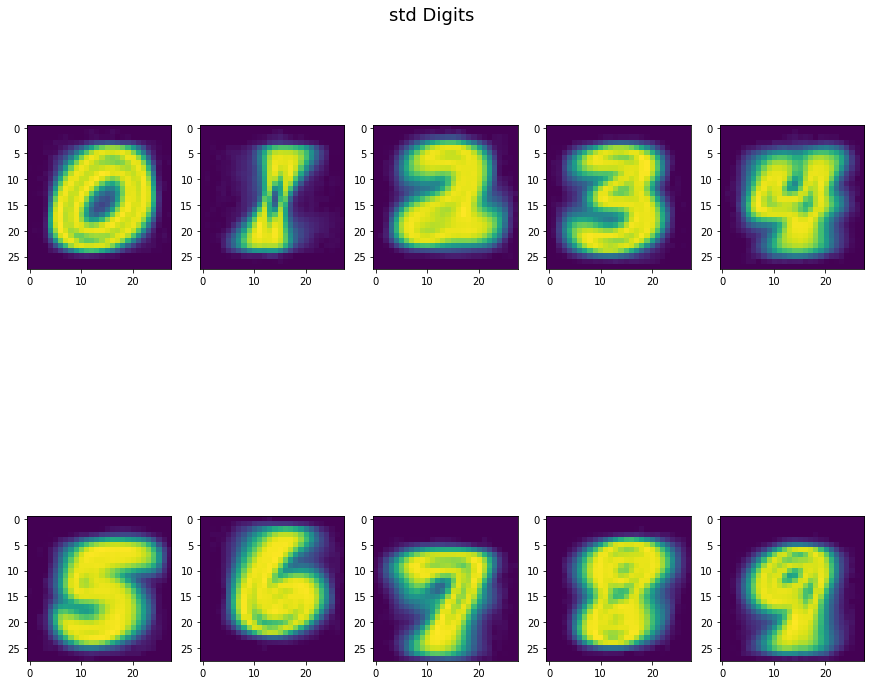

In [198]:
fig, axes = plt.subplots(2, 5, figsize=(15, 12)) 
plt.subplots_adjust(hspace=0.5)
fig.suptitle("std Digits", fontsize=18, y=0.95)
for img, ax in zip(std_digits, axes.flat):
  ax.imshow(img)

In [199]:
class Naive_Bayes:


  def __init__(self):

    self.epsilon = tf.cast((1e-2), tf.float64)
    self.priors_list = []

    
    
    



  def find_class_conditionals(self,class_id,x):  

    x_flat = x.reshape(-1,784)
    mean = self.mean_digits[class_id]
    std = self.std_digits[class_id]

    numerator = tf.math.exp(- (x_flat - mean)**2 / (2 * std + epsilon))
    denominator = tf.math.sqrt(2 * m.pi * (std + epsilon))
    likelihood = numerator/denominator

    return likelihood



  def fit(self,x,y):

    self.mean_digits = []
    self.std_digits = []

    

    x_flat = x.reshape(-1,784)
    classes, samples = x_flat.shape
    self.num_classes = np.unique(y)
    for label in num_classes:
      
      x_train_by_label = tf.cast(tf.convert_to_tensor(x_flat[y_train == label]), tf.float64)
      mean = tf.cast((tf.reduce_mean(x_train_by_label, axis=0)), tf.float64)
      self.mean_digits.append(mean)
      std = tf.cast((tf.math.reduce_variance(x_train_by_label, axis=0)), tf.float64)
      self.std_digits.append(std)
      prior = x_train_by_label.shape[0]/float(samples)
      self.priors_list.append(prior)
      




  def _predict(self,x):

    x_flat = x.reshape(-1,784)
    classes, samples = x_flat.shape
    count = 0
    self.discriminant_function = []
    
    for idx, c in enumerate(self.num_classes):
        prior = tf.cast((tf.math.log(self.priors_list[idx])), tf.float64)
        posterior = tf.cast((tf.reduce_sum(tf.math.log(self.find_class_conditionals(idx, x_flat)))), tf.float64)
        posterior = posterior + prior
        self.discriminant_function.append(posterior)

    prediction = self.num_classes[tf.argmax(self.discriminant_function)]

        
    return prediction


  
  def predict(self, X):
      count = 0
      self.predictions = []
      for x in X:
        print("Sample number: ", count) 
        y_pred = int(tf.constant(self._predict(x)))
        self.predictions.append(y_pred)
        print("Prediction: ", y_pred)
        count += 1
      return y_pred


  def compute_accuracy(self,y_true):
    y_pred_binary = tf.round(self.predictions)
    temp = tf.cast(tf.equal(y_pred_binary, y_true), tf.float64)
    accuracy = float(tf.constant(tf.reduce_mean(temp))) * 100
    batch_loss = float(tf.reduce_sum(temp))
    print("IN CASE OF NAIVE BAYES ACCURACY AND ZERO-ONE LOSS ARE THE SAME")
    print("Batch zero-one loss: ", float(batch_loss))
    print("accuracy as a percentage: ", accuracy )


  


In [200]:

model = Naive_Bayes()
model.fit(x_train, y_train)


In [201]:
prediction = model.predict(x_test)

Streaming output truncated to the last 5000 lines.
Sample number:  7500
Prediction:  1
Sample number:  7501
Prediction:  3
Sample number:  7502
Prediction:  8
Sample number:  7503
Prediction:  6
Sample number:  7504
Prediction:  7
Sample number:  7505
Prediction:  5
Sample number:  7506
Prediction:  0
Sample number:  7507
Prediction:  1
Sample number:  7508
Prediction:  2
Sample number:  7509
Prediction:  3
Sample number:  7510
Prediction:  4
Sample number:  7511
Prediction:  0
Sample number:  7512
Prediction:  6
Sample number:  7513
Prediction:  7
Sample number:  7514
Prediction:  8
Sample number:  7515
Prediction:  9
Sample number:  7516
Prediction:  0
Sample number:  7517
Prediction:  1
Sample number:  7518
Prediction:  2
Sample number:  7519
Prediction:  3
Sample number:  7520
Prediction:  4
Sample number:  7521
Prediction:  5
Sample number:  7522
Prediction:  6
Sample number:  7523
Prediction:  7
Sample number:  7524
Prediction:  8
Sample number:  7525
Prediction:  9
Sample number

In [204]:

model.compute_accuracy(y_test)

IN CASE OF NAIVE BAYES ACCURACY AND ZERO-ONE LOSS ARE THE SAME
Batch zero-one loss:  8215.0
accuracy as a percentage:  82.15


In [289]:
def find_discriminant_function(j,x_test):

  x_flat = x_test[j].reshape(-1,784)
  discriminant_function = []
  for idx, c in enumerate(num_classes):
        prior = tf.cast((tf.math.log(model.priors_list[idx])), tf.float64)
        posterior = tf.cast((tf.reduce_sum(tf.math.log(model.find_class_conditionals(idx, x_flat)))), tf.float64)
        posterior = posterior + prior
        discriminant_function.append(posterior)
  print(np.asarray(discriminant_function))



In [291]:
find_discriminant_function(0,x_test)

[ -79.30502898 -837.51397607 -129.6193643   217.78511075  265.57448563
  232.60608494 -487.10331914  592.77854828  211.10566602  475.63934358]


In [304]:
def draw_correct_incorrect_set(y_true,x_test):
      
      
      correct = []
      incorrect = []


      for i in range(x_test.shape[0]):
        if model.predictions[i] == y_true[i]:
          correct.append(x_test[i])
          
        else:
          
          incorrect.append(x_test[i])
          
      
      
      return correct , incorrect

          


In [322]:
def display(x):
  plt.figure()
  plt.imshow(x)


In [305]:
correct , incorrect = draw_correct_incorrect_set(y_test,x_test)

In [333]:
def get_correct(correct):
  for i in range(10):
          print("Output of discriminant function for correctly classified sample ", i)
          find_discriminant_function(i,x_test)
          print()
          print()
          display(correct[i])

In [335]:
def get_incorrect(incorrect):
  for i in range(10):
          print("Output of discriminant function for correctly classified sample ", i)
          find_discriminant_function(i,x_test)
          print()
          print()
          display(incorrect[i])

Output of discriminant function for correctly classified sample  0
[ -79.30502898 -837.51397607 -129.6193643   217.78511075  265.57448563
  232.60608494 -487.10331914  592.77854828  211.10566602  475.63934358]


Output of discriminant function for correctly classified sample  1
[ -246.47967372 -1329.94100857   292.05317756  -102.02095335
  -788.61460177  -221.94446152   -67.24128099 -2064.82891072
  -381.42496287 -1484.80982895]


Output of discriminant function for correctly classified sample  2
[191.8886832  786.72056276 442.34322765 444.22203594 447.53397594
 464.58879881 447.01241661 330.79025215 474.51081732 400.81174404]


Output of discriminant function for correctly classified sample  3
[  482.20170091 -2833.16975669   224.00850864   221.97873052
   142.26194085   286.3770898    341.52276235  -241.97089375
   276.35592096    -4.92900012]


Output of discriminant function for correctly classified sample  4
[  305.85846316 -1344.12700018   318.77996481   276.23111733
   512.05958

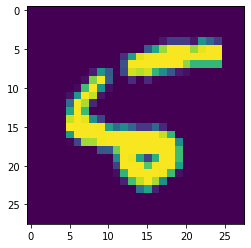

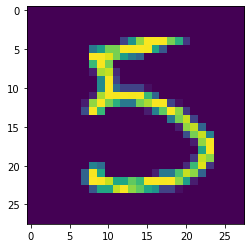

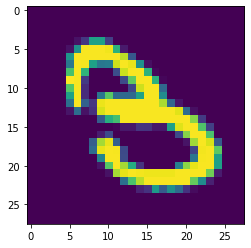

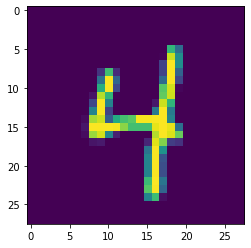

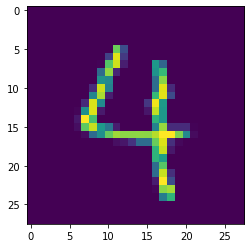

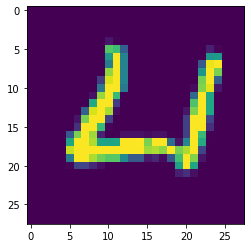

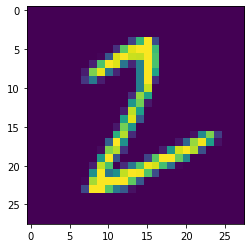

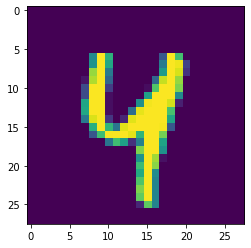

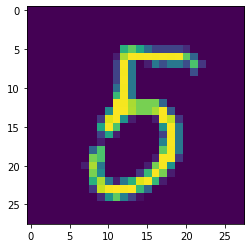

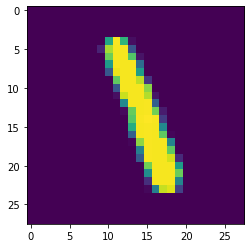

In [336]:
get_incorrect(incorrect)

Output of discriminant function for correctly classified sample  0
[ -79.30502898 -837.51397607 -129.6193643   217.78511075  265.57448563
  232.60608494 -487.10331914  592.77854828  211.10566602  475.63934358]


Output of discriminant function for correctly classified sample  1
[ -246.47967372 -1329.94100857   292.05317756  -102.02095335
  -788.61460177  -221.94446152   -67.24128099 -2064.82891072
  -381.42496287 -1484.80982895]


Output of discriminant function for correctly classified sample  2
[191.8886832  786.72056276 442.34322765 444.22203594 447.53397594
 464.58879881 447.01241661 330.79025215 474.51081732 400.81174404]


Output of discriminant function for correctly classified sample  3
[  482.20170091 -2833.16975669   224.00850864   221.97873052
   142.26194085   286.3770898    341.52276235  -241.97089375
   276.35592096    -4.92900012]


Output of discriminant function for correctly classified sample  4
[  305.85846316 -1344.12700018   318.77996481   276.23111733
   512.05958

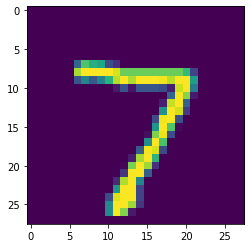

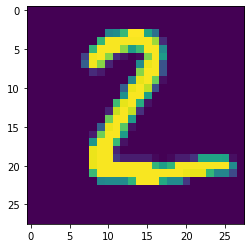

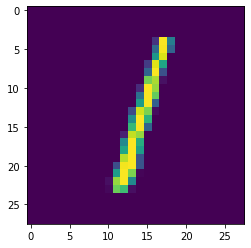

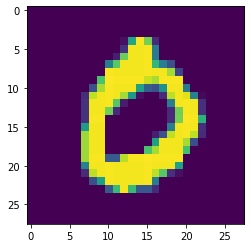

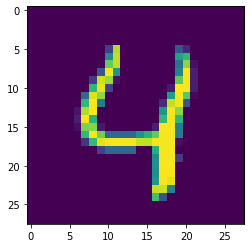

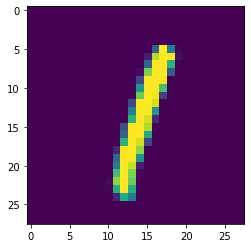

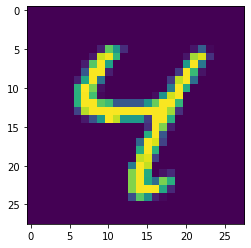

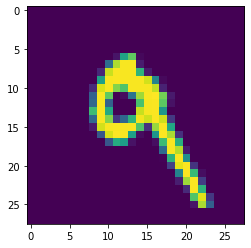

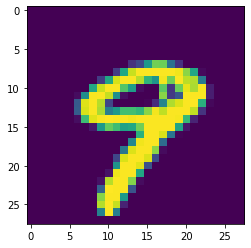

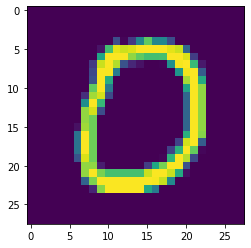

In [337]:
get_correct(correct)

In [377]:
def plot_confusion_matrix(y_test,y_pred):
  y_test_df = pd.Series(np.array(y_test))
  y_test_df.shape
  y_pred_df = pd.Series(y_pred)
  confusion_matrix = pd.crosstab(y_test_df, y_pred_df, rownames=['Actual'], colnames=['Predicted'])

  sn.heatmap(confusion_matrix, annot=True)
  plt.show()
  

  

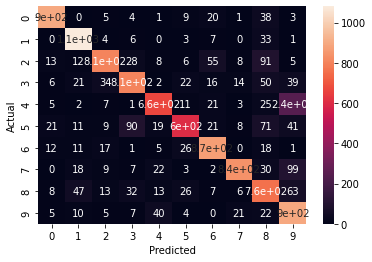

In [378]:
plot_confusion_matrix(y_test,model.predictions)

WHY IS THE NAIVE BAYES MODEL NOT GOOD?

Although the Naive Bayes classifier generates competitive classification accuracy, the estimations of the probabilities of data point-class label connection are somewhat imprecise.

The conditional independence assumption of the Naive Bayes classifier—that is, the notion that characteristics are independent of one another when conditioned upon class labels—is rarely true. Many characteristics frequently contain comparable signals because they frequently depend on one another in non-trivial amounts. Yet, because of the conditional independence assumption, the Naive Bayes classifier treats characteristics as separate signals, each of which should independently increase the predictor's confidence. The contribution of signals to the final classification confidence is amplified by this phenomena. Because the independence assumption favors various class labels to a nearly equal level on average, the Naive Bayes classifier nevertheless provides competitive classification accuracy.